In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

#### Код к решению задачи 1.2.1 

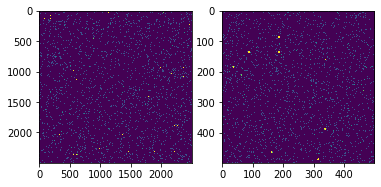

In [2]:
#Уменьшение изображения
img = cv2.imread("data/n1.png")
img_resized = np.mean(cv2.resize(img, (img.shape[0]//8, img.shape[1]//8)), axis = 2)

plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.subplot(1,2,2)

plt.imshow(img_resized[0:500,0:500])

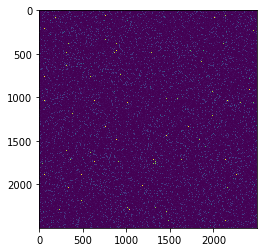

In [3]:
#Уберем шум
from skimage.filters import gaussian

binary_smooth = gaussian(img_resized, sigma = 0.5)
plt.imshow(binary_smooth)

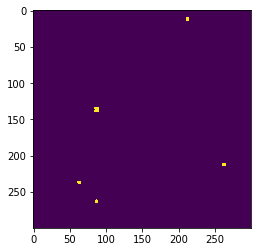

In [5]:
#бинаризация
binary = np.zeros_like(binary_smooth)
binary[binary_smooth>125] = 1

plt.imshow(binary[250:250+300, 250:250+300])

In [6]:
#Считаем количество фигур
from skimage.measure import label, regionprops

LB = label(binary)
print("Искомое количество фигур: ", np.unique(LB)[-1])

Искомое количество фигур:  235


#### Код к решению задачи 1.2.2

In [8]:
#84 83 68
#Считаем всех по отдельности 
%matplotlib inline

objects = regionprops(LB)

sqere = 0
circle = 0
trig = 0
for obj in objects:
    if obj.area < 45:
        if len(obj.image[obj.image == 0].ravel())/len(obj.image[obj.image == 1].ravel()) >= 0.31:
            trig+=1
        else:
            circle+=1
    else:
        sqere+=1
        
print("Секлов %d, Скверов %d, Тригов %d"%(sqere, circle, trig))

Секлов 84, Скверов 83, Тригов 68


##### Код к решению задачи 1.2.3

In [11]:
#определение координат

sqere = []
circle = []
trig = []

cell_width = img_resized.shape[0]//100
for obj in objects:
    if obj.area < 45:
        if len(obj.image[obj.image == 0].ravel())/len(obj.image[obj.image == 1].ravel()) >= 0.31:
            trig.append([obj.centroid[0]//cell_width,obj.centroid[1]//cell_width])
        else:
            circle.append([obj.centroid[0]//cell_width,obj.centroid[1]//cell_width])
    else:
        sqere.append([obj.centroid[0]//cell_width,obj.centroid[1]//cell_width])
        
print("Sqeres: ", sqere)
print()
print("Circles: ", circle)
print()
print("Trigs: ", trig)

Sqeres:  [[0.0, 51.0], [1.0, 67.0], [2.0, 85.0], [3.0, 7.0], [3.0, 80.0], [5.0, 3.0], [5.0, 7.0], [5.0, 63.0], [9.0, 98.0], [11.0, 66.0], [15.0, 13.0], [15.0, 35.0], [15.0, 84.0], [17.0, 48.0], [18.0, 38.0], [19.0, 34.0], [19.0, 51.0], [21.0, 67.0], [22.0, 44.0], [22.0, 72.0], [23.0, 74.0], [24.0, 16.0], [26.0, 10.0], [27.0, 18.0], [29.0, 37.0], [30.0, 2.0], [30.0, 23.0], [31.0, 11.0], [33.0, 79.0], [33.0, 83.0], [37.0, 79.0], [37.0, 94.0], [39.0, 22.0], [39.0, 46.0], [39.0, 82.0], [40.0, 58.0], [41.0, 25.0], [41.0, 86.0], [42.0, 40.0], [42.0, 92.0], [42.0, 98.0], [43.0, 42.0], [45.0, 44.0], [46.0, 27.0], [48.0, 22.0], [48.0, 79.0], [51.0, 22.0], [53.0, 56.0], [53.0, 68.0], [55.0, 80.0], [56.0, 6.0], [56.0, 71.0], [57.0, 58.0], [59.0, 35.0], [62.0, 76.0], [64.0, 12.0], [64.0, 17.0], [64.0, 27.0], [65.0, 23.0], [68.0, 85.0], [69.0, 53.0], [70.0, 1.0], [70.0, 78.0], [71.0, 63.0], [72.0, 48.0], [75.0, 90.0], [76.0, 39.0], [78.0, 25.0], [79.0, 27.0], [80.0, 47.0], [81.0, 13.0], [82.0, 46.0

#### Код к решению задачу 1.2.4 и 1.2.5

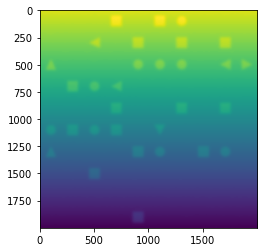

In [14]:
#Убираем засветы

img = np.load("example2.npy")
plt.imshow(img)

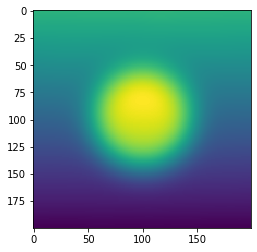

In [15]:
f_part = img[:200,1200:1400].copy()
p = int(np.std(f_part) + np.median(f_part))
plt.imshow(f_part)

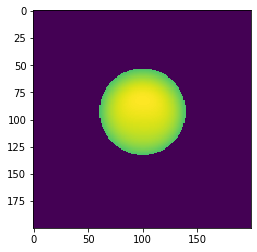

In [16]:
f_part[f_part<p] = np.min(f_part) 
plt.imshow(f_part)

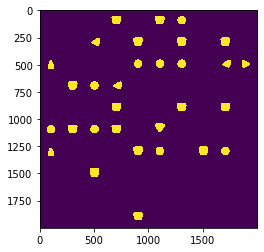

In [17]:
f_cpy = img.copy()
result = np.zeros_like(img)
for i in range(0,img.shape[0],200):
    for j in range(0,img.shape[1],200):
        f_part = f_cpy[i:i+200,j:j+200]
        p = int(np.std(f_part) + np.median(f_part))
        if np.std(f_part) > 60:
            result[i:i+200,j:j+200][f_part>p] = 1
plt.imshow(result)

## 